In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
def correlation_matrix_ss(x):
    """
    Compute the correlation matrix of a matrix x, where each row is a
    sample and each column is a variable.
    """
    # Compute the covariance matrix
    cov = np.cov(x, rowvar=0)
    # Compute the standard deviation of each variable
    std = np.std(x, axis=0)
    # Compute the correlation matrix
    corr = cov / np.outer(std, std)
    return corr

In [3]:
def plot_correlation_matrix(corr):
    """
    Plot the correlation matrix of pandas dataset.
    """
    import matplotlib.pyplot as plt
    plt.imshow(corr, interpolation='nearest')
    plt.colorbar()
    plt.show()

In [4]:
### Indices for column names
indices = tree_stats_idx = {
    "max_H": 0,
    "min_H": 1,
    "a_BL_mean": 2,
    "a_BL_median": 3,
    "a_BL_var": 4,
    "e_BL_mean": 5,
    "e_BL_median": 6,
    "e_BL_var": 7,
    "i_BL_mean_1": 8,
    "i_BL_median_1": 9,
    "i_BL_var_1": 10,
    "ie_BL_mean_1": 11,
    "ie_BL_median_1": 12,
    "ie_BL_var_1": 13,
    "i_BL_mean_2": 14,
    "i_BL_median_2": 15,
    "i_BL_var_2": 16,
    "ie_BL_mean_2": 17,
    "ie_BL_median_2": 18,
    "ie_BL_var_2": 19,
    "i_BL_mean_3": 20,
    "i_BL_median_3": 21,
    "i_BL_var_3": 22,
    "ie_BL_mean_3": 23,
    "ie_BL_median_3": 24,
    "ie_BL_var_3": 25,
    "colless": 26,
    "sackin": 27,
    "WD_ratio": 28,
    "delta_w": 29,
    "max_ladder": 30,
    "IL_nodes": 31,
    "staircaseness_1": 32,
    "staircaseness_2": 33,
    "tree_size": 34,
}
allele_stats_indices = {
    'pi':0, ## Sequence diversity
    'theta_w':1,
    'tajimas_d':2,
    'f_st':3,
    'f_is':4,
    'entropy':5,
    'delta_gc_content':6,
    'n_segregating_sites':7,
    'n_variants':8,
    'n_haplotypes':9,
    'h1':10,
    'h12':11,
    'h123':12,
    'h2_h1':13,
    'haplotype_diversity':14,
    'allele_freq_max':15,
    'allele_freq_min':16,
    'allele_freq_mean':17,
    'allele_freq_median':18,
    'allele_freq_var':19,
    'ihs':20,
}
##Add allele related stats
indices.update({key: len(tree_stats_idx) + idx for key, idx in allele_stats_indices.items()})

indices.update({
    "n_individuals" : 56 ,
    "mutation_rate" : 57,
    "n_generations" : 58,
    "max_mutations" : 59
})

In [5]:
path_ss = "/Users/berk/Projects/jlees/data/plots/20230509-0906/simulation_results.npy"
data_ss = np.load(path_ss)
pd_ss = pd.DataFrame(data_ss, columns=indices.keys())

In [10]:
pd_ss.describe()

/opt/anaconda3/envs/elfi/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,max_H,min_H,a_BL_mean,a_BL_median,a_BL_var,e_BL_mean,e_BL_median,e_BL_var,i_BL_mean_1,i_BL_median_1,...,allele_freq_max,allele_freq_min,allele_freq_mean,allele_freq_median,allele_freq_var,ihs,n_individuals,mutation_rate,n_generations,max_mutations
count,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,...,12964.000000,12964.0,12964.000000,12964.000000,12964.000000,155.0,12964.000000,12964.000000,12964.0,12964.0
mean,0.209401,0.011032,0.024367,0.000665,0.002162,0.021813,0.003338,0.001229,0.013952,0.004658,...,0.866509,0.0,0.106845,0.013134,0.046414,0.0,341.523604,0.554406,100.0,500.0
std,0.130074,0.028322,0.013034,0.006517,0.006609,0.012012,0.013223,0.000627,0.058106,0.052074,...,0.242190,0.0,0.088583,0.039486,0.053559,0.0,337.594678,0.327994,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,8.000000,0.001000,100.0,500.0
25%,0.099976,0.000000,0.017838,0.000000,0.001206,0.014511,0.000000,0.000894,0.000011,0.000000,...,0.825000,0.0,0.040464,0.000000,0.007584,0.0,64.000000,0.330000,100.0,500.0
50%,0.185303,0.000000,0.024460,0.000000,0.001465,0.022369,0.000000,0.001321,0.000033,0.000000,...,1.000000,0.0,0.074614,0.000000,0.023431,0.0,200.000000,0.500000,100.0,500.0
75%,0.291016,0.000000,0.029831,0.000000,0.001645,0.029526,0.000000,0.001639,0.016346,0.000017,...,1.000000,0.0,0.145859,0.007812,0.067699,0.0,700.000000,0.820000,100.0,500.0
max,0.847656,0.099976,0.278076,0.099976,0.138428,0.099976,0.099976,0.002501,1.000000,1.000000,...,1.000000,0.0,0.460625,0.406250,0.226878,0.0,1000.000000,1.000000,100.0,500.0


In [6]:
pd_ss = pd_ss.drop_duplicates()

In [108]:
"""pd_ss.drop(columns=[
    "entropy", "a_BL_median", "a_BL_var", "e_BL_median", "f_is", "f_st", "i_BL_mean_1",
    "i_BL_median_1", "i_BL_var_1", "ie_BL_var_1", "ie_BL_var_2",
    "ihs", "n_segregating_sites",
], inplace=True)"""

In [7]:
### We do not want to use these parameters
pd_ss.drop(
    columns=[
        "max_mutations",
        "n_generations"
    ], inplace=True)


In [8]:
### Drop row if all 0.0s
rows_dropped = pd_ss.iloc[:,:-2].any(axis=1)
pd_ss = pd_ss.loc[rows_dropped, :]

In [9]:
pd_ss.replace([np.inf, -np.inf], np.nan, inplace=True)

In [10]:
pd_ss = pd_ss.dropna(axis=1, how="all")

In [11]:
### Drop columns are mostly nans
column_na_freq_fltr = pd_ss.isnull().sum()/max(pd_ss.count()) > 0.4
pd_ss.drop(columns=pd_ss.loc[:, column_na_freq_fltr].columns, inplace=True)

In [12]:
pd_ss.isnull().sum()

max_H                     0
min_H                     0
a_BL_mean                 0
a_BL_median               0
a_BL_var                  0
e_BL_mean                 0
e_BL_median               0
e_BL_var                  0
i_BL_mean_1               0
i_BL_median_1             0
i_BL_var_1                0
ie_BL_mean_1            794
ie_BL_var_1             795
i_BL_mean_2               0
i_BL_median_2             0
i_BL_var_2                0
ie_BL_mean_2            294
ie_BL_var_2             296
i_BL_mean_3               0
i_BL_median_3             0
i_BL_var_3                0
ie_BL_mean_3            794
ie_BL_var_3             795
colless                   0
sackin                    0
WD_ratio                  0
delta_w                   0
max_ladder                0
IL_nodes                  0
staircaseness_1           0
staircaseness_2           0
tree_size                 0
pi                        0
theta_w                   0
tajimas_d              3252
delta_gc_content    

<AxesSubplot:>

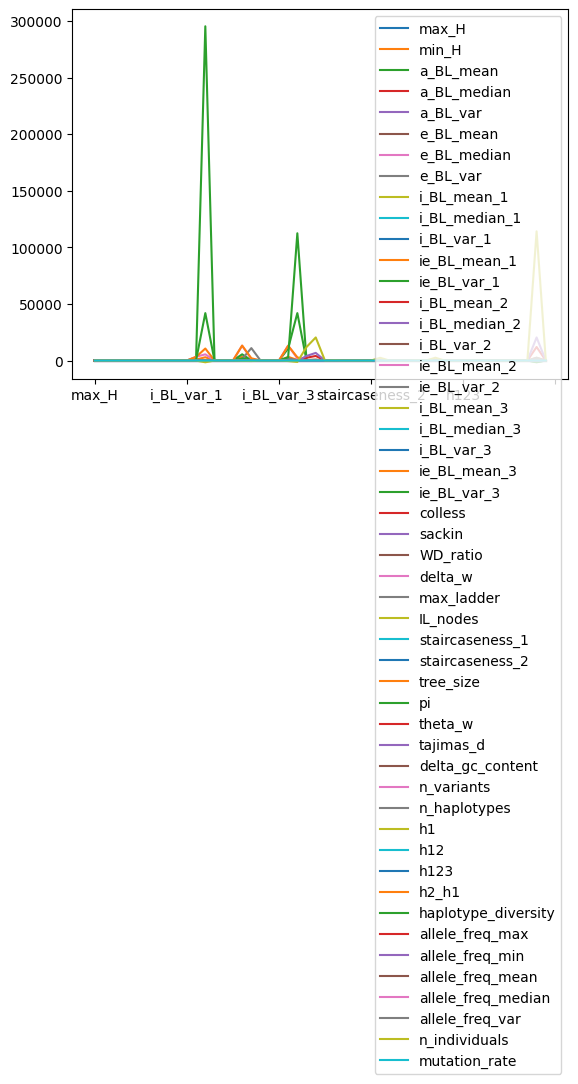

In [13]:
pd_ss.cov().plot()

<AxesSubplot:>

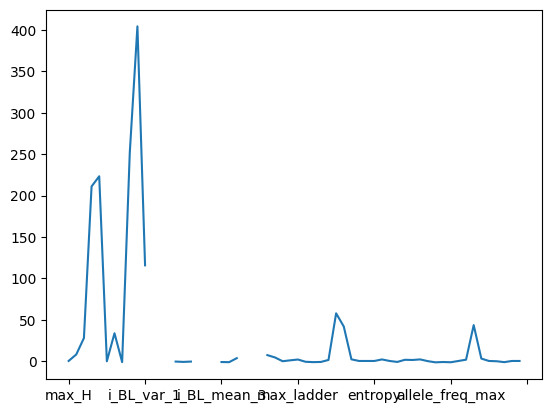

In [7]:
pd_ss.kurtosis().plot()

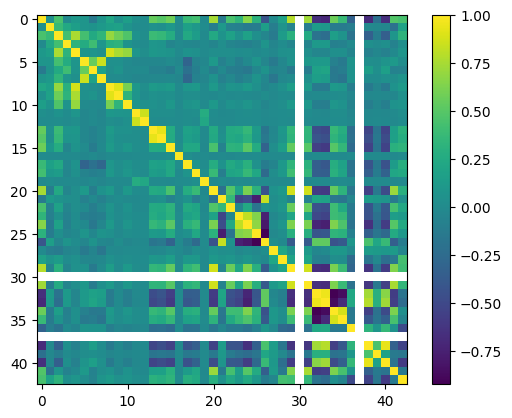

In [17]:
plot_correlation_matrix(pd_ss.corr())

In [15]:
### Deal with high correlations
pd_features = pd_ss.iloc[:,:-2]
# Compute the correlation matrix
corr_matrix = pd_features.corr().abs()

# Set the threshold for high correlation
corr_threshold = 0.95

# Get the upper triangular matrix
upper_triangular = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with high correlation
high_corr_features = {column for column in upper_triangular.columns if any(upper_triangular[column] > corr_threshold)}


/opt/anaconda3/envs/elfi/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


In [16]:
# Remove features with high correlation
pd_ss = pd_ss.drop(high_corr_features, axis=1)

In [118]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 15.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 28.7 MB/s eta 0:00:00


In [136]:
### Variance Inflation Factor --> Multicollinearity
### https://github.com/statsmodels/statsmodels/issues/2376
"""
Seems the package cannot calculate it properly
"""
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(pd_features.dropna())

#high_vif_features = {c for i, c in enumerate(X.columns) if variance_inflation_factor(X.values, i) > 100}
high_vif_features = {c:variance_inflation_factor(X.values, i) for i, c in enumerate(X.columns)}

/opt/anaconda3/envs/elfi/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [20]:
### Fill or drop na
### Drop all rows containing na for now

pd_naless = pd_ss.dropna(axis=0, how="any")

In [26]:
pd_norm = pd_naless

In [25]:
### Normalise the data
from sklearn.preprocessing import MinMaxScaler
pd_norm_features = pd.DataFrame(MinMaxScaler().fit_transform(pd_naless.iloc[:,:-2]), columns=pd_naless.columns[:-2])
pd_norm = pd_norm_features.merge(pd_naless.iloc[:,-2:], how="inner", left_index=True, right_index=True)

In [152]:
### select 'k' most important features based on a scoring function with sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#X_ne = SelectKBest(f_regression, k="all").fit_transform(features, Ne)
#X_mu = SelectKBest(f_regression, k="all").fit_transform(features, mu)

#Ne_selected_features = features.columns[SelectKBest(f_regression, k =20).fit(X, Ne).get_support()]



/opt/anaconda3/envs/elfi/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/opt/anaconda3/envs/elfi/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/opt/anaconda3/envs/elfi/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [ ]:
###features, Ne, mu = pd_norm.iloc[:,:-2], pd_norm.iloc[:,-2], pd_norm.iloc[:,-1]

In [ ]:
### Calculate f-statistics



                          PC0       PC1       PC2           PC3           PC4  \
max_H               -0.174831 -0.005586 -0.024039 -3.546342e-02 -3.830791e-02   
min_H               -0.007513  0.139197 -0.198872 -3.718773e-02 -5.636928e-02   
a_BL_mean           -0.034586  0.027062 -0.009742 -4.992427e-03 -2.898249e-02   
a_BL_median          0.001291  0.009676 -0.001418 -9.131241e-04 -9.924749e-03   
a_BL_var            -0.006819  0.009034 -0.007757 -2.434256e-03 -3.050348e-03   
e_BL_mean            0.005023 -0.053463  0.034613 -1.079040e-01 -1.171696e-01   
e_BL_median          0.028701 -0.008975  0.012841 -3.454424e-02 -2.860859e-02   
e_BL_var             0.018591 -0.030229  0.031092 -1.369242e-01 -1.388030e-01   
i_BL_mean_1         -0.013665  0.004830 -0.013576 -5.151216e-03 -4.630162e-03   
i_BL_median_1       -0.001630  0.005912 -0.009474 -2.502458e-03 -2.736078e-04   
i_BL_var_1          -0.013395 -0.002829 -0.016421 -7.600613e-03 -3.403897e-03   
ie_BL_mean_1        -0.00206

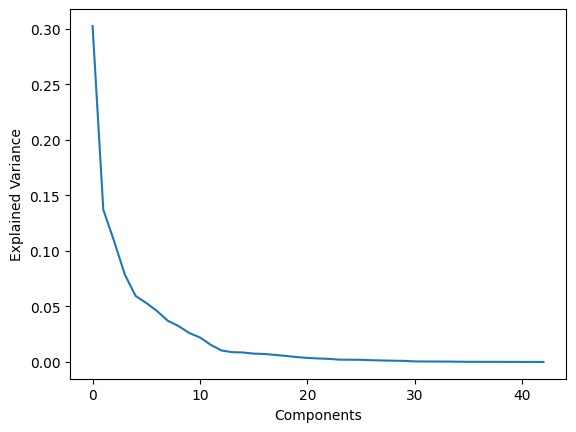

In [21]:
"""from sklearn.decomposition import PCA

pca = PCA(n_components=pd_norm.shape[1])
pca.fit(pd_norm)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
                            columns=['PC%s' % _ for _ in range(len(pd_norm.columns))],
                            index=pd_norm.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()"""

In [25]:
sum(pca.explained_variance_ratio_[:15])

0.9468351511606755

In [ ]:
### Model trials

In [24]:
!pip install torch

In [29]:
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
import math

In [30]:
batch_size =62

In [31]:

df_t = torch.tensor(pd_norm.values, dtype=torch.float32, device="cpu")
training_data_fw, test_data_fw = random_split(df_t, [0.7, 0.3])
train_dataloader = DataLoader(training_data_fw, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data_fw, batch_size=batch_size)

In [32]:
##### Create Models

In [41]:
# Get cpu, gpu or mps device for training.
"""device = ( ### Raises problems with Apple's architecture
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)"""
device = "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(n_inputs, n_inputs*2),
            nn.ReLU(),
            nn.Linear(n_inputs*2, n_inputs//2),
            nn.ReLU(),
            nn.Linear(n_inputs//2, n_outputs*2),
            nn.Tanh(),
            nn.Linear(n_outputs*2, n_outputs)
            #nn.Linear(n_inputs*2, n_outputs)

        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

#model = NeuralNetwork(pd_norm.iloc[:,:-2].shape[1], 1).to(device)
model = NeuralNetwork(41, 2).to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=41, out_features=82, bias=True)
    (1): ReLU()
    (2): Linear(in_features=82, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=4, bias=True)
    (5): Tanh()
    (6): Linear(in_features=4, out_features=2, bias=True)
  )
)


In [34]:
#### Optimizing the Model Parameters

In [42]:
loss_fn = nn.L1Loss()
#loss_fn = nn.MSELoss()
#loss_fn = nn.HuberLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
optimizer = torch.optim.Adamax(model.parameters(), lr=1e-3)

In [43]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, data in enumerate(train_dataloader):
        ## y includes y_ne, y_mu
        X, y = data[:,:-2], data[:,-2:]
        #Calculate for effective population first
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 1000 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [66]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for data in dataloader:
            X, y = data[:,:-2], data[:,-2:]
            #Calculate for effective population first
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (np.isclose(pred.argmax(), y)).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

In [61]:
device = "cpu"

In [67]:
epochs = 1000
for t in range(epochs):
    if t%10 == 0:
        print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Final train and test loss")
test(train_dataloader, model, loss_fn)
test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 17.784433  [   62/ 6314]


KeyboardInterrupt: 

In [ ]:
##TODO: Implement optimazation for hyper-parameters

In [ ]:
##TODO: plot the predicted and actual values, plot loss

In [40]:
#### Save Model
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [ ]:
### Load Model
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))